# String Representation

In [1]:
class Cat:
    def speak(self):
        print("meow")

class Dog:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def is_puppy(self):
        return self.age < 2

    def speak(self):
        msg = "bark"
        if self.is_puppy():
            msg = "bark! "*5
        elif self.age > 10:
            msg = "grrrr"

        print(self.name + ": " + msg)

sam = Dog("Sam", 1)
sam.speak()

Sam: bark! bark! bark! bark! bark! 


In [2]:
sam

In [3]:
print(sam)

In [4]:
class Cat:
    def speak(self):
        print("meow")

class Dog:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def is_puppy(self):
        return self.age < 2

    def speak(self):
        msg = "bark"
        if self.is_puppy():
            msg = "bark! "*5
        elif self.age > 10:
            msg = "grrrr"

        print(self.name + ": " + msg)
        
    def __str__(self):
        return "{} the {}-old dog".format(self.name, self.age)
    
    def __repr__(self):
        return "Dog(name={}, age={})".format(repr(self.name), self.age)

    def _repr_html_(self):
        return "<h3><i>{}</i> the dog!</h3>".format(self.name)

    #def __eq__(self, other):
    #    return self.name == other.name and self.age == other.age
    
    #def __lt__(self, other):
    #    print("is {} < {}?".format(self, other))
    #    return self.age < other.age

sam = Dog("Sam", 1)
print(sam)

Sam the 1-old dog


In [5]:
sam

Dog(name='Sam', age=1)

In [6]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["font.size"]

10.0

# Comparison

In [7]:
d1 = Dog("Sam", 1)
d2 = Dog("Fluffy", 3)
d3 = Dog("Cuddles", 2)

In [8]:
sorted([d3, d1, d2])

TypeError: '<' not supported between instances of 'Dog' and 'Dog'

# Range Example

In [9]:
class Range:
    def __init__(self, v1, v2=None):
        if v2 != None:
            self.start = v1
            self.end = v2
        else:
            self.start = 0
            self.end = v1
            
    def __len__(self):
        return self.end - self.start
    
    def __repr__(self):
        return str(list(self))
    
    def __getitem__(self, lookup):
        if isinstance(lookup, slice):
            raise NotImplementedError("slicing not supported yet")
            #start = self.start + lookup.start
            #end = start + (lookup.stop - lookup.start)
            #return Range(start, end)

        num = self.start + lookup
        if num < self.start or num >= self.end:
            raise IndexError
        return num

In [10]:
r1 = Range(5)
len(r1)

5

In [11]:
r2 = Range(2, 10)
len(r2)

8

In [12]:
for i in r1:
    print(i)

0
1
2
3
4


In [13]:
for i in Range(3):
    print(i)

0
1
2


In [14]:
list(r2)

[2, 3, 4, 5, 6, 7, 8, 9]

# Series

In [15]:
from pandas import Series as OrigSeries

In [16]:
import copy

class Series:
    def __init__(self, values):
        self.iloc = IntPosLookup(self)
        self.loc = IndexLookup(self)
        self.items = [] # list of SeriesItem's
        self.index = {} # index => SeriesItem

        if isinstance(values, list):
            for i in range(len(values)):
                self.append(idx=i, val=values[i])
        elif isinstance(values, dict):
            for key in values:
                self.append(idx=key, val=values[key])
        else:
            raise NotImplementedError("only works with lists+dicts")

    def sum(self):
        total = 0
        for si in self.items:
            total += si.val
        return total
            
    def append(self, idx, val):
        item = SeriesItem(idx=idx, val=val)
        self.items.append(item)
        self.index[idx] = item
        
    def sort_index(self):
        s2 = copy.deepcopy(self)
        s2.items.sort(key=lambda item: item.idx)
        return s2
    
    def sort_values(self):
        s2 = copy.deepcopy(self)
        s2.items.sort(key=lambda item: item.val)
        return s2

    def __repr__(self):
        s = ""
        for item in self.items:
            line = str(item.idx)
            line += "  "*(3-len(line))
            line += str(item.val)
            s += line + "\n"
        s += "dtype: ???"
        return s

class SeriesItem:
    def __init__(self, idx, val):
        self.idx = idx
        self.val = val
    
class IntPosLookup:
    def __init__(self, series):
        self.series = series
        
    def __getitem__(self, pos):
        return self.series.items[pos].val

class IndexLookup:
    def __init__(self, series):
        self.series = series

    def __getitem__(self, idx):
        return self.series.index[idx].val
    
    def __setitem__(self, idx, val):
        if idx in self.series.index:
            self.series.index[idx].val = val
        else:
            self.series.append(idx, val)
    
s1 = Series([9, 7, 8])
print(s1)
print()

s2 = Series({"A": 9, "B": 7, "C": 8})
print(s2)
print()

print(s1.sum())
print(s2.iloc[0])
print(s2.loc["A"])

s2.loc["A"] = 100
print(s2)
print()
s2.loc["B"] = 200
print(s2)
print()

s3 = s2.sort_values()
print(s3)
print()

s4 = s3.sort_index()
print(s4)
print()

0    9
1    7
2    8
dtype: ???

A    9
B    7
C    8
dtype: ???

24
9
9
A    100
B    7
C    8
dtype: ???

A    100
B    200
C    8
dtype: ???

C    8
A    100
B    200
dtype: ???

A    100
B    200
C    8
dtype: ???



# Context Managers

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faeed0dda20>)

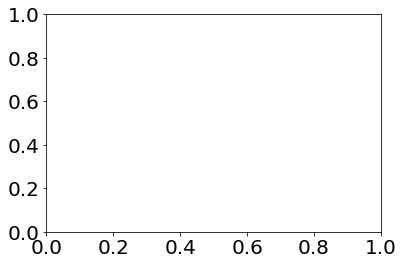

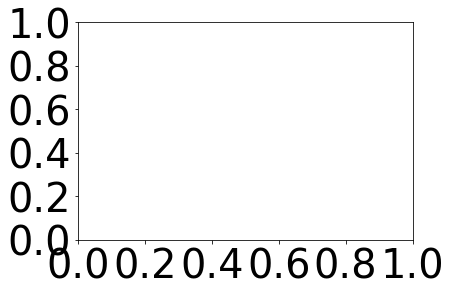

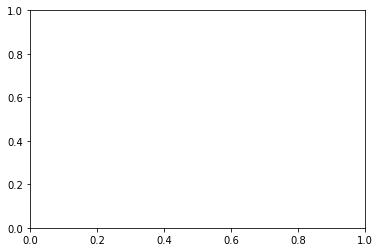

In [17]:
class DoubleFont:
    def __enter__(self):
        self.prior = matplotlib.rcParams["font.size"]
        matplotlib.rcParams["font.size"] *= 2

    def __exit__(self, exc_type, exc_value, traceback):
        matplotlib.rcParams["font.size"] = self.prior
        
with DoubleFont():
    plt.subplots()
    with DoubleFont():
        plt.subplots()
    # TODO: assert failure
plt.subplots()